# Hands on: Iris Dataset
O Iris Dataset é um conjunto de dados clássico na área de Machine Learning, introduzido por Ronald Fisher em 1936. Sua simplicidade e clareza o tornam ideal para aprender conceitos básicos de Machine Learning, como treinamento, validação e avaliação de modelos. Ele contém informações sobre três espécies de flores Iris e a separação clara entre elas facilita a identificação visual de padrões.

# Classificação de Espécies de Flores

## Espécies
- Setosa
- Versicolor
- Virgínica

## Características (Features)
- Comprimento da Sépala (cm)
- Largura da Sépala (cm)
- Comprimento da Pétala (cm)
- Largura da Pétala (cm)

## Objetivo
Classificar a espécie da flor com base nessas medidas.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
# Carregar dataset
iris = load_iris()
x = iris.data # Features (medidas)
y = iris.target # Target (espécies, Setosa, Versicolor, Virgínica)

print(f'X: {x} \n')
print(f'Y: {x}')

print(f'X.shape: {x.shape} \n')
print(f'Y.shape: {x.shape}')

print(f'iris.features_names: {iris.feature_names}')

X: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1

In [8]:
# Converter para Dataframe (para visualização)
df = pd.DataFrame(x, columns=iris.feature_names)
df['target'] = iris.target

print(f'A Base de dados tem {df.shape[0]} linhas e {df.shape[1]} colunas')

print(f'Infos target (Especie): {df['target'].unique()}')

df.head()

A Base de dados tem 150 linhas e 5 colunas
Infos target (Especie): [0 1 2]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [10]:
print('Distribuição das especies\n')
print(df['target'].value_counts())

Distribuição das especies

target
0    50
1    50
2    50
Name: count, dtype: int64


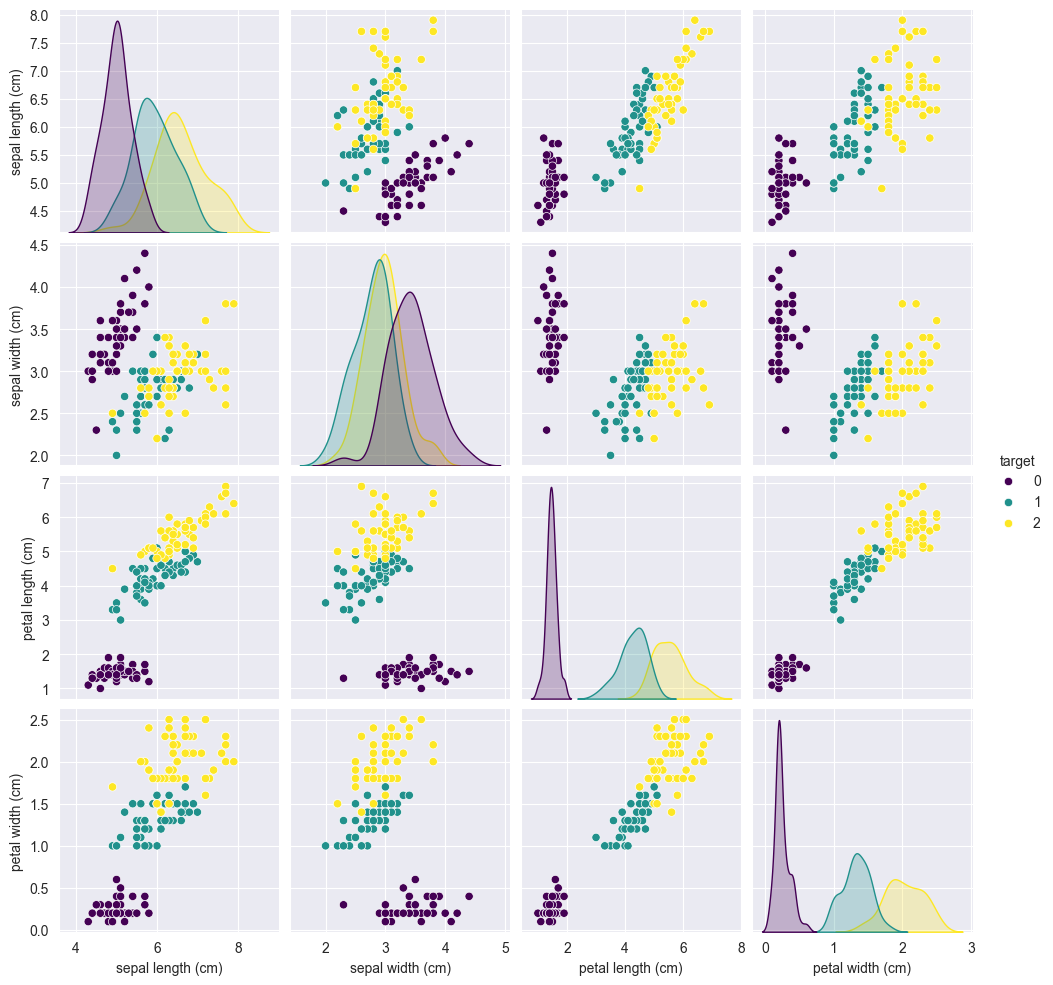

In [11]:
sns.pairplot(df, hue='target', palette='viridis')
plt.show()

In [12]:
# Pre Processamento
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=77)

<p>
Essa separação é essencial para evitar o overfitting (modelo que decora os dados). O <span class="pos-text-highlight">random_state=77</span> assegura reprodutibilidade: qualquer pessoa que execute o código terá a mesma divisão de dados.
</p>

In [13]:
modelo = KNeighborsClassifier(n_neighbors=3)
modelo.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


<p>
  O KNN classifica amostras com base nos vizinhos mais próximos. O valor k=3 é arbitrário; em projetos reais, testaríamos múltiplos valores. O método fit() ajusta o modelo aos dados, aprendendo a relação entre as características e espécies.
</p>

In [14]:
y_pred = modelo.predict(X_test)

acuracia = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {acuracia}')

Acurácia do modelo: 0.9333333333333333


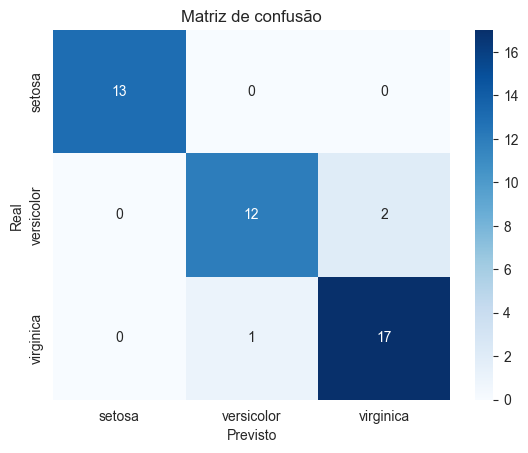

In [15]:
matriz_confusao = confusion_matrix(y_test, y_pred)
sns.heatmap(matriz_confusao, annot=True, cmap='Blues', fmt='d',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de confusão')
plt.show()

In [16]:
print('Relatório de classificação')
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Relatório de classificação
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.92      0.86      0.89        14
   virginica       0.89      0.94      0.92        18

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.94        45
weighted avg       0.93      0.93      0.93        45



# Interpretação dos Resultados
<p>
  O modelo tem alta performance, mas ainda há espaço para otimização.
</p>
<p>
  A alta acurácia reflete a simplicidade do dataset, mas em problemas reais (dados mais complexos), ajustar hiperparâmetros (ex.: testar k=5 ou k=7) ou usar algoritmos como SVM/Árvores seria crucial.
</p>
<p>
  A matriz de confusão direciona melhorias, como coletar mais dados para classes confundidas.
</p>
<p>
  Dessa maneira, esse fluxo ilustra o ciclo completo de um projeto de Machine Learning:
</p>
<pos-box>
  <p>
    <span class="pos-text-highlight">Carregar Dados → Explorar → Pré-processar → Treinar → Avaliar → Iterar.</span>
  </p>
</pos-box>
<p>
  <span class="pos-text-highlight">Easter egg: “O Guia do Mochileiro das Galáxias”</span>
</p>
<p>
  Para encerrar, trazemos uma observação que une Machine Learning e a cultura geek:
</p>
